In [30]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
file_path = './trump.txt'

In [32]:
#Formatting data from text file into lists
file_content = []

with open(file_path) as file:
    trump_tweets_text = file.readlines()
    for content in trump_tweets_text:
        file_content.append([content.strip()])
        
file.close()

header = file_content[0]
data = file_content[1:]
col_names = header[0].split(',')
tweets = []
for item in data:
    seperated_items = item[0].split(',')
    tweets.append(seperated_items)

In [33]:
#creating data frame out of file contents
tweets_corpes_df = pd.DataFrame(columns = col_names, data = tweets)

In [34]:
#Dataframe issues: ALL dtypes are objects-str 
#                  need to modify these columns: (created_at retweet_count favorite_count is_retweet)
#                  There are null values
#                  Retweets are mixed in with original tweets
tweets_corpes_df.head(7)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,“Congressman Van Drew (D-NJ) SLAMS Democrats f...,11-18-2019 16:06:19,2765,9167,false,1196459630060359686
1,Twitter for iPhone,Just finished a very good &amp; cordial meetin...,11-18-2019 16:01:42,3193,12462,false,1196458467982270464
2,Twitter for iPhone,Just finished a very good &amp; cordial meetin...,11-18-2019 15:49:55,2523,8981,false,1196455500940038144
3,Twitter for iPhone,....that I testify about the phony Impeachment...,11-18-2019 13:52:24,7224,26868,false,1196425928768929792
4,Twitter for iPhone,Our Crazy Do Nothing (where’s USMCA infrastruc...,11-18-2019 13:52:22,9905,33588,false,1196425921802178560
5,Twitter for iPhone,Never has the Republican Party been so united ...,11-18-2019 12:29:38,16484,67143,false,1196405099741896705
6,Twitter for iPhone,RT @SteveScalise: Schiff controls who testifie...,11-18-2019 12:14:37,13505,0,true,1196401321387216901


In [35]:
tweets_corpes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42774 entries, 0 to 42773
Data columns (total 7 columns):
source            42774 non-null object
text              42770 non-null object
created_at        42767 non-null object
retweet_count     42767 non-null object
favorite_count    42767 non-null object
is_retweet        42767 non-null object
id_str            42764 non-null object
dtypes: object(7)
memory usage: 2.3+ MB


In [36]:
tweets_corpes_df.isnull().sum()

source             0
text               4
created_at         7
retweet_count      7
favorite_count     7
is_retweet         7
id_str            10
dtype: int64

In [37]:
#Finding entries with null values
tweets_corpes_df[tweets_corpes_df['text'].isnull()].index

Int64Index([42397, 42398, 42399, 42400], dtype='int64')

In [38]:
tweets_corpes_df[tweets_corpes_df['created_at'].isnull()].index

Int64Index([42248, 42372, 42396, 42397, 42398, 42399, 42400], dtype='int64')

In [39]:
tweets_corpes_df[tweets_corpes_df['retweet_count'].isnull()].index

Int64Index([42248, 42372, 42396, 42397, 42398, 42399, 42400], dtype='int64')

In [40]:
#The entries that have null values seem to be missing everything else 
#Showing this df shows the entries with null values
null_release_mask = tweets_corpes_df['retweet_count'].isnull()
tweets_corpes_df[null_release_mask]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
42248,TweetDeck,My interview which recently aired on CNBC's Sq...,None,None,None,None,None
42372,TweetDeck,http://goo.gl/AMNEE Countdown to @AmericaNowRa...,None,None,None,None,None
42396,TweetDeck,http://bit.ly/pwgGsQ,None,None,None,None,None
42397,,None,None,None,None,None,None
42398,http://bit.ly/pwgGsQ,None,None,None,None,None,None
42399,,None,None,None,None,None,None
42400,,None,None,None,None,None,None


In [41]:
#Dropping the entries with null values to clean up df
clean_tweets_df = tweets_corpes_df.dropna()

In [42]:
clean_tweets_df.isnull().sum()

source            0
text              0
created_at        0
retweet_count     0
favorite_count    0
is_retweet        0
id_str            0
dtype: int64

In [43]:
clean_tweets_df.shape

(42764, 7)

In [44]:
# Changing the data types to approperiate dtypes
# Adding a new col with bool values
clean_tweets_df['is_retweet'] = clean_tweets_df['is_retweet'].map({'true': True, 'false' : False})
clean_tweets_df['tweet_dates'] = pd.to_datetime(tweets_corpes_df['created_at'], errors = 'coerce')
clean_tweets_df['retweet_count'] = clean_tweets_df['retweet_count'].apply(lambda x: float(x))
clean_tweets_df['favorite_count'] = clean_tweets_df['favorite_count'].apply(lambda x: float(x))

C:\Users\fs4re\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fs4re\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\fs4re\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [45]:
clean_tweets_df['text'] = clean_tweets_df['text'].str.replace(r'https{0,1}://[^\s]*', 'LINK') 

C:\Users\fs4re\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
clean_tweets_df.drop(['id_str', 'created_at'], inplace = True, axis = 1)

In [47]:
#All dtypes have been modified accordingly
clean_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42764 entries, 0 to 42773
Data columns (total 6 columns):
source            42764 non-null object
text              42764 non-null object
retweet_count     42764 non-null float64
favorite_count    42764 non-null float64
is_retweet        42706 non-null object
tweet_dates       42764 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.3+ MB


In [48]:
# Creating subsets of the df into tweets written by Trump - originals
#                            and retweeted tweets -- RT
notretweet_mask = clean_tweets_df['is_retweet'] == False
original_tweets_df = clean_tweets_df[notretweet_mask]

In [49]:
original_tweets_df.head(3)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
0,Twitter for iPhone,“Congressman Van Drew (D-NJ) SLAMS Democrats f...,2765.0,9167.0,False,2019-11-18 16:06:19
1,Twitter for iPhone,Just finished a very good &amp; cordial meetin...,3193.0,12462.0,False,2019-11-18 16:01:42
2,Twitter for iPhone,Just finished a very good &amp; cordial meetin...,2523.0,8981.0,False,2019-11-18 15:49:55


In [50]:
isretweet_mask = clean_tweets_df['is_retweet'] == True
RT_tweets_df = clean_tweets_df[isretweet_mask]

In [51]:
RT_tweets_df.head(3)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
6,Twitter for iPhone,RT @SteveScalise: Schiff controls who testifie...,13505.0,0.0,True,2019-11-18 12:14:37
23,Twitter for iPhone,RT @EricTrump: I hope no one who serves our co...,22265.0,0.0,True,2019-11-17 18:34:10
24,Twitter for iPhone,RT @EricTrump: Trump Washington D.C! @TrumpDC ...,5833.0,0.0,True,2019-11-17 18:33:34


In [52]:
# comparing the sizes
print('Retweets in his account {}'.format(RT_tweets_df.shape))
print('Originals tweets {}'.format(original_tweets_df.shape))

Retweets in his account (3159, 6)
Originals tweets (39547, 6)


In [53]:
clean_tweets_df['text'] = clean_tweets_df['text'].str.strip()

C:\Users\fs4re\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
#Saving the new and cleaned up data to a file
clean_tweets_df.to_csv('./clean_tweets_corpes.csv', index = False)
original_tweets_df.to_csv('./original_tweets_corpes.csv', index = False)
RT_tweets_df.to_csv('./RT_corpes.csv', index = False)

In [55]:
original_tweets_df.dtypes

source                    object
text                      object
retweet_count            float64
favorite_count           float64
is_retweet                object
tweet_dates       datetime64[ns]
dtype: object

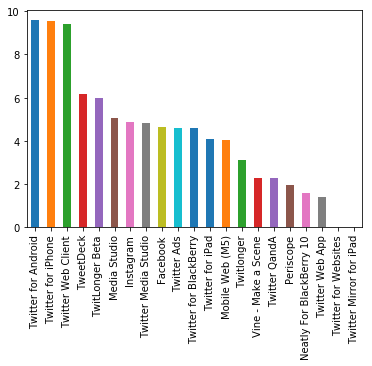

In [56]:
np.log(clean_tweets_df['source'].value_counts()).plot(kind = 'bar')

Text(0, 0.5, 'log scale')

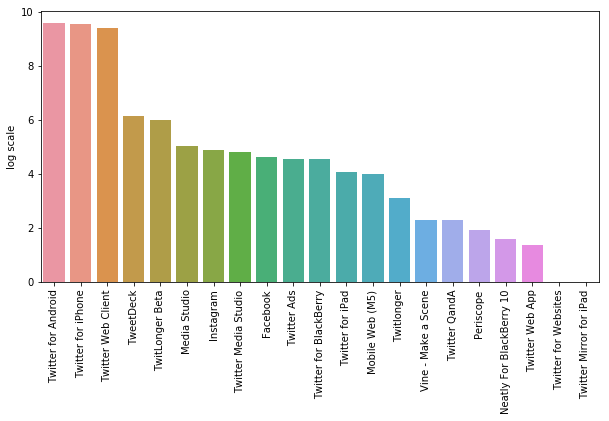

In [57]:
vc = clean_tweets_df["source"].value_counts()
plt.figure(figsize = (10,5))
source_graph = sns.barplot(x=vc.index,y=np.log(vc.values))
source_graph.set_xticklabels(source_graph.get_xticklabels(),rotation=90);
plt.ylabel('log scale')

In [58]:
mask = clean_tweets_df['source'] == 'Vine - Make a Scene'
clean_tweets_df[mask]

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
30821,Vine - Make a Scene,#TrumpVine on ObamaCare website- LINK,344.0,276.0,False,2013-11-05 14:52:14
31721,Vine - Make a Scene,Wow with all this talk @MissUniverse is going ...,67.0,31.0,False,2013-09-12 20:58:29
31832,Vine - Make a Scene,#TrumpVine from D.C.- LINK,321.0,307.0,False,2013-09-10 12:28:25
32156,Vine - Make a Scene,#TrumpVine A message for my hotel guest @Miley...,416.0,281.0,False,2013-08-29 19:05:43
32393,Vine - Make a Scene,#TrumpVine Opinion on Egypt- LINK,96.0,72.0,False,2013-08-19 18:17:28
32465,Vine - Make a Scene,#TrumpVine Where is the money @MacMiller? LINK,569.0,501.0,False,2013-08-15 14:38:22
32679,Vine - Make a Scene,#TrumpVine Weiner is a joke.... LINK,167.0,210.0,False,2013-08-07 14:38:26
32793,Vine - Make a Scene,#TrumpVine @arod sucks! LINK,373.0,230.0,False,2013-08-01 14:35:46
32915,Vine - Make a Scene,#TrumpVine A message for @AnthonyWeiner- LINK,214.0,141.0,False,2013-07-26 15:55:04
32975,Vine - Make a Scene,Watch the first #TrumpVine re: Anthony Weiner-...,105.0,96.0,False,2013-07-24 14:14:26
